# Expectation Maximization for Gaussian Mixture Model

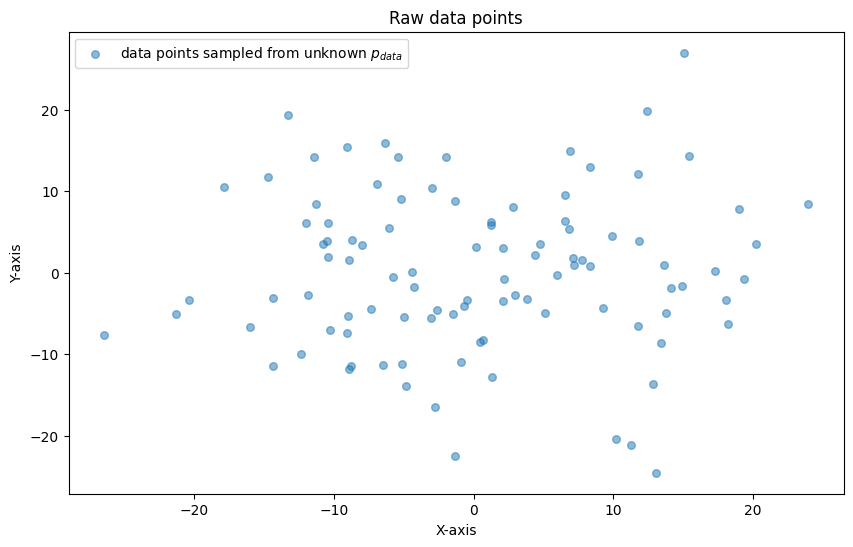

In [8]:
import numpy as np
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def initialize_parameters(data, num_components):
    """
    Initializes the parameters: mixture weights, means, and covariances.
    """
    num_features = data.shape[1]
    weights = np.ones(num_components) / num_components
    means = data[np.random.choice(data.shape[0], num_components, False)]
    covariances = np.array([np.cov(data.T) for _ in range(num_components)])
    return weights, means, covariances

def e_step(data, weights, means, covariances):
    """
    The E-step of the EM algorithm.
    """
    num_samples = data.shape[0]
    num_components = len(weights)
    responsibilities = np.zeros((num_samples, num_components))

    for i in range(num_components):
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(data, means[i], covariances[i])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)

    return responsibilities

def m_step(data, responsibilities):
    """
    The M-step of the EM algorithm.
    """
    num_samples, num_features = data.shape
    num_components = responsibilities.shape[1]

    weights = responsibilities.sum(axis=0) / num_samples
    means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, np.newaxis]
    covariances = np.zeros((num_components, num_features, num_features))

    for i in range(num_components):
        diff = data - means[i]
        covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / responsibilities[:, i].sum()

    return weights, means, covariances

def gmm_em(data, num_components, num_iterations):
    """
    EM algorithm for a Gaussian Mixture Model.
    """
    weights, means, covariances = initialize_parameters(data, num_components)

    for _ in range(num_iterations):
        responsibilities = e_step(data, weights, means, covariances)
        weights, means, covariances = m_step(data, responsibilities)

    return weights, means, covariances

# Example usage
data = np.random.randn(100, 2)+10 * np.random.randn(100, 2) # Replace with your dataset

def plot_data(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], s=30, alpha=0.5, label="data points sampled from unknown $p_{data}$")
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    x, y = np.mgrid[np.min(data[:,0])-1:np.max(data[:,0])+1:.01, np.min(data[:,1])-1:np.max(data[:,1])+1:.01]
    pos = np.dstack((x, y))

    # for i, (mean, cov) in enumerate(zip(means, covariances)):
    #     rv = multivariate_normal(mean, cov)
    #     plt.contour(x, y, rv.pdf(pos), colors=colors[i], levels=5)
    #     plt.scatter(mean[0], mean[1], marker='o', color='k', s=100, lw=3, label=f"Mean {i+1}")

    plt.title("Raw data points")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()

plot_data(data) 

In [9]:
num_components = 3  # Number of Gaussian components
num_iterations = 100  # Number of iterations for the EM algorithm

weights, means, covariances = gmm_em(data, num_components, num_iterations)

print("Weights:", weights)
print("Means:", means)
print("Covariances:", covariances)


Weights: [0.1314684  0.69371104 0.17482056]
Means: [[ -3.57846603 -14.12148792]
 [  1.45920671   3.88450094]
 [ -1.67890213  -4.21366613]]
Covariances: [[[ 92.51728653 -48.82148639]
  [-48.82148639  33.32645062]]

 [[104.52303982  -6.40062504]
  [ -6.40062504  68.25766582]]

 [[143.5450426   14.20399252]
  [ 14.20399252   6.1477504 ]]]


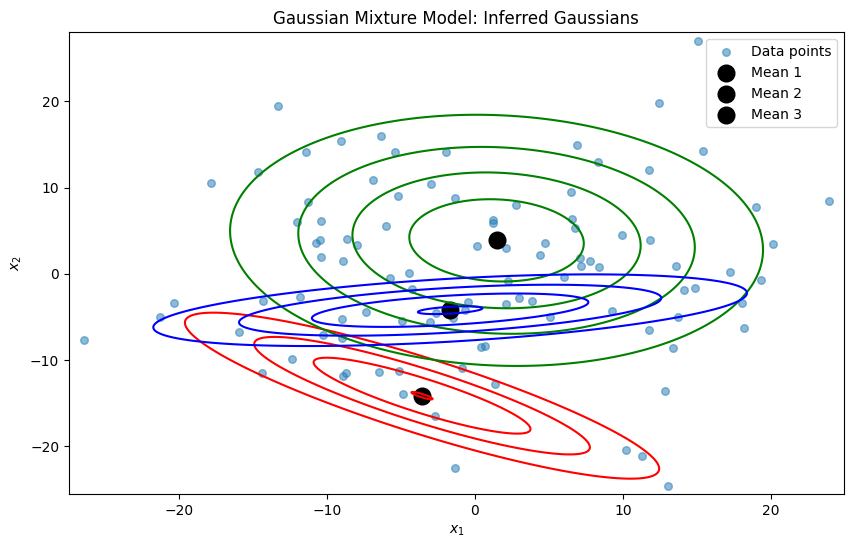

In [11]:
def plot_results(data, means, covariances):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], s=30, alpha=0.5, label="Data points")
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    x, y = np.mgrid[np.min(data[:,0])-1:np.max(data[:,0])+1:.01, np.min(data[:,1])-1:np.max(data[:,1])+1:.01]
    pos = np.dstack((x, y))

    for i, (mean, cov) in enumerate(zip(means, covariances)):
        rv = multivariate_normal(mean, cov)
        plt.contour(x, y, rv.pdf(pos), colors=colors[i], levels=5)
        plt.scatter(mean[0], mean[1], marker='o', color='k', s=100, lw=3, label=f"Mean {i+1}")

    plt.title("Gaussian Mixture Model: Inferred Gaussians")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.show()

# Example usage (make sure to replace 'means' and 'covariances' with your results)
plot_results(data, means, covariances)
